# DATS 6103 - INDIVIDUAL PROJECT - 2

## ARUSHI KAPOOR 

## TOPIC 

### The purpose of this project is to explore the following economic indicators *Labor Force*, *Unemployment Rates*, *Inflation Rates*, *Population* and *GDP Per Capita* across the world for the time period, 2015 to 2019.

### Historically, inflation and unemployment maintain an inverse relationship. Low levels of unemployment correspond with higher inflation, while high rates of unemployment correspond with lower rates of inflation or even deflation.

### I would like to explore whether the same still holds true for most nations in the given period. Additionally, if the same does not hold true for some nations, I would like to explore the potential reasons attributing to it. 

### 1. SOURCE OF THE DATA 

The required datasets were procured from The World Bank Data website.

For this project, the following datasets have been accessed from the source for analyses - 

1. Labor Force (in thousands)

2. Unemployment, total (% of labor force)

3. Inflation, consumer prices (annual %) 

4. Population, total (in thousands)

5. GDP Per Capita (in current USD) 

### 2. READING, CLEANING & PRE - PROCESSING THE DATASETS 

The given datasets were read using pandas software library and the merged into one to form a complete dataset for analyses. 

First, a list of criteria was created to drop the irrelvant data points. Then a function was created to clean the datasets, which can be seen below. 

In [599]:
# Creating a list of criteria 
not_needed=['East Asia & Pacific','Europe & Central Asia','Latin America & Caribbean','Middle East & North Africa','North America','South Asia','Sub-Saharan Africa', 'High income','Low & middle income','Low income','Lower middle income','Middle income','Upper middle income', 'World','Arab World','Central Europe and the Baltics','Caribbean small states','East Asia & Pacific (excluding high income)',
                 'Early-demographic dividend', 'Europe & Central Asia (excluding high income)', 'Euro area','European Union','Fragile and conflict affected situations', 'Heavily indebted poor countries (HIPC)','IBRD only', 'IDA & IBRD total', 'IDA total','IDA blend','IDA only',
                 'Latin America & Caribbean (excluding high income)', 'Least developed countries: UN classification','Late-demographic dividend','Middle East & North Africa (excluding high income)', 'OECD members','Other small states', 'Pacific island small states', 'Pre-demographic dividend','Post-demographic dividend','Sub-Saharan Africa (excluding high income)','Small states','East Asia & Pacific (IDA & IBRD countries)',
                 'Europe & Central Asia (IDA & IBRD countries)','Latin America & the Caribbean (IDA & IBRD countries)',
                 'Middle East & North Africa (IDA & IBRD countries)','South Asia (IDA & IBRD)',
                 'Sub-Saharan Africa (IDA & IBRD countries)']

In [600]:
import pandas as pd
def display_relevant(dataset):
    data = pd.read_csv(dataset)
    data = data[['Country Name', 'Country Code', '2015', '2016', '2017', '2018', '2019']]
    data = data.dropna()
    dirty_data = data[data['Country Name'].isin(not_needed)]
    dirty_data_indexed = dirty_data.index
    clean_data=data.drop(dirty_data_indexed)
    return clean_data

Unemployment = display_relevant("Unemployment.csv")
Inflation = display_relevant("Inflation.csv")
Population = display_relevant("Population.csv")
GDP_Capita = display_relevant("GDP_Capita.csv")
Labor_Force = display_relevant("Labor Force.csv")

For analyses, the datasets were converted into a long format and merged together using the given function. 

In [601]:
def display_long(df):
    df_long = pd.melt(df,id_vars=['Country Name', 'Country Code'],var_name='Year', value_name='Value').set_index(['Country Name','Country Code'])
    df_long = df_long.reset_index()
    return df_long

Unemployment_long = display_long(Unemployment)
Inflation_long = display_long(Inflation)
Population_long = display_long(Population)
GDP_Capita_long = display_long(GDP_Capita)
Labor_Force_long = display_long(Labor_Force)

The 'Value' columns were renamed respectively as follows.

In [602]:
Unemployment_long.rename(columns={'Value':'Unemployment %'}, inplace=True)
Inflation_long.rename(columns={'Value':'Inflation %'}, inplace=True)
Population_long.rename(columns={'Value':'Population'}, inplace=True)
GDP_Capita_long.rename(columns={'Value':'GDP Per Capita'}, inplace=True)
Labor_Force_long.rename(columns={'Value':'Labor Force'}, inplace=True)

First the long datasets were stored together into a list and then merged together to form the Complete dataset. 

In [603]:
dfs = [Unemployment_long, Inflation_long, Population_long, GDP_Capita_long, Labor_Force_long]
dfs

[             Country Name Country Code  Year  Unemployment %
 0             Afghanistan          AFG  2015          11.387
 1                  Angola          AGO  2015           7.282
 2                 Albania          ALB  2015          17.080
 3    United Arab Emirates          ARE  2015           1.910
 4               Argentina          ARG  2015           7.750
 ..                    ...          ...   ...             ...
 930                 Samoa          WSM  2019           8.359
 931           Yemen, Rep.          YEM  2019          12.910
 932          South Africa          ZAF  2019          28.181
 933                Zambia          ZMB  2019          11.425
 934              Zimbabwe          ZWE  2019           4.954
 
 [935 rows x 4 columns],
              Country Name Country Code  Year  Inflation %
 0                   Aruba          ABW  2015     0.474764
 1             Afghanistan          AFG  2015    -0.661709
 2                  Angola          AGO  2015   -21.

In [604]:
Complete = reduce(lambda left, right: pd.merge(left, right, on=['Country Name', 'Country Code', 'Year']), dfs)
Complete

,Country Name,Country Code,Year,Unemployment %,Inflation %,Population,GDP Per Capita,Labor Force
0,Afghanistan,AFG,2015,11.387,-0.661709,34413603.0,578.466353,9176450.0
1,Angola,AGO,2015,7.282,-21.531694,27884381.0,4166.979684,11437925.0
2,Albania,ALB,2015,17.080,1.896174,2880703.0,3952.801215,1289562.0
3,United Arab Emirates,ARE,2015,1.910,4.069966,9262900.0,38663.383810,6600371.0
4,Armenia,ARM,2015,18.261,3.731691,2925553.0,3607.296697,1334775.0
...,...,...,...,...,...,...,...,...
710,Vietnam,VNM,2019,2.013,2.795824,96462106.0,2715.276036,57364650.0
711,Vanuatu,VUT,2019,4.385,2.762520,299882.0,3058.065675,128427.0
712,Samoa,WSM,2019,8.359,0.982327,197097.0,4315.920675,53500.0
713,South Africa,ZAF,2019,28.181,4.124351,58558270.0,6001.400814,23300226.0


A new dataset, consisting of Country Names and Codes was downloaded and merged with the Complete dataset for graphing purposes. The new dataset, data.csv was downloaded from datahub.io through the following - 

https://datahub.io/JohnSnowLabs/country-and-continent-codes-list#resource-country-and-continent-codes-list_zip

In [605]:
Country_Code=pd.read_csv('data.csv')
Country_Code=Country_Code[['Continent_Name', 'Three_Letter_Country_Code']]
Country_Code.head()

,Continent_Name,Three_Letter_Country_Code
0,Asia,AFG
1,Europe,ALB
2,Antarctica,ATA
3,Africa,DZA
4,Oceania,ASM


The final dataset was named data which consists of all the required information needed for visualization purposes. 

In [606]:
data=pd.merge(Complete, Country_Code, left_on= 'Country Code', right_on= 'Three_Letter_Country_Code', how= 'left')
data = data.drop(labels='Three_Letter_Country_Code', axis=1)
data.head()

,Country Name,Country Code,Year,Unemployment %,Inflation %,Population,GDP Per Capita,Labor Force,Continent_Name
0,Afghanistan,AFG,2015,11.387,-0.661709,34413603.0,578.466353,9176450.0,Asia
1,Angola,AGO,2015,7.282,-21.531694,27884381.0,4166.979684,11437925.0,Africa
2,Albania,ALB,2015,17.080,1.896174,2880703.0,3952.801215,1289562.0,Europe
3,United Arab Emirates,ARE,2015,1.910,4.069966,9262900.0,38663.383810,6600371.0,Asia
4,Armenia,ARM,2015,18.261,3.731691,2925553.0,3607.296697,1334775.0,Asia


In [690]:
data['Change in Unemployment Rates'] = data.groupby('Country Name')['Unemployment %'].pct_change(periods=4)

In [691]:
data

,Country Name,Country Code,Year,Unemployment %,Inflation %,Population,GDP Per Capita,Labor Force,Continent_Name,Change in Unemployment Rates,Change in Inflation Rates
0,Afghanistan,AFG,2015,11.387,-0.661709,34413603.0,578.466353,9176450.0,Asia,NaN,NaN
1,Angola,AGO,2015,7.282,-21.531694,27884381.0,4166.979684,11437925.0,Africa,NaN,NaN
2,Albania,ALB,2015,17.080,1.896174,2880703.0,3952.801215,1289562.0,Europe,NaN,NaN
3,United Arab Emirates,ARE,2015,1.910,4.069966,9262900.0,38663.383810,6600371.0,Asia,NaN,NaN
4,Armenia,ARM,2015,18.261,3.731691,2925553.0,3607.296697,1334775.0,Asia,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
735,Vietnam,VNM,2019,2.013,2.795824,96462106.0,2715.276036,57364650.0,Asia,-0.052706,3.429372
736,Vanuatu,VUT,2019,4.385,2.762520,299882.0,3058.065675,128427.0,Oceania,-0.039851,0.112453
737,Samoa,WSM,2019,8.359,0.982327,197097.0,4315.920675,53500.0,Oceania,-0.034311,0.355924
738,South Africa,ZAF,2019,28.181,4.124351,58558270.0,6001.400814,23300226.0,Africa,0.120250,-0.085349


### 3. VISUALIZING THE DATA

In [607]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### 1. Unemployment Rates Across The World 

In [608]:
fig = px.choropleth(data, title="Unemployment Rates Across The World", locations="Country Code", color="Unemployment %", hover_name="Country Name", animation_frame="Year", range_color=[0, 30])
fig.show()

#### Key Findings

As we play the above visual, we observe a significant increase in unemployment in South Africa, Spain, Brazil and Namibia in the past five years. 

#### 2. Inflation Rates Across The World

In [609]:
fig = px.choropleth(data,  title="Inflation Rates Across The World", locations="Country Code", color="Inflation %", hover_name="Country Name", animation_frame="Year", range_color=[0, 30])
fig.show()

#### Key Findings

As we play the above visual, we observe the following - 

1. A significant decrease in inflation in Russia, Ukraine, Kazakhstan and Brazil in the past five years.
2. A significant increase in inflation in Angola, Turkey and Sudan in the past five years. 

#### 3. Exploring relationships among the given economic indicators

#### 3.1. Between Labor Force and Unemployment Rates

In [708]:
fig = px.scatter(data, x="Labor Force", y="Unemployment %", animation_frame="Year", animation_group="Country Name",
           size="Population", color="Continent_Name", hover_name="Country Name", facet_col="Continent_Name", facet_col_spacing=0.03,
log_x=True, size_max=45)
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.show()

#### Key Findings

1. Across continents, the labor force of most countries has remained consistent over time while the unemployment rates have fluctuated significantly. 

2. In Asia, Armenia is observed to be an outlier over the given time period. 


3. In Africa, South Africa is observed to have the highest unemployment rate in 2015 and 2019. 


4. In Europe, Bosnia and Herzegovina ranks the highest in unemployment rate in 2015, 2016 and 2019. In 2017, Greece took the lead whereas North Macedonia had the highest unemployment rate in 2018. 


5. In Oceania, Australia is observed to have the highest unemployment rate throughout.  


6. In North America, Haiti is observed to have the highest unemployment rate throughout.


7. In South America, Brazil leads with the highest unemployment rate for the given time period. 

#### 3.2 Between Unemployment Rates and Inflation Rates

In [611]:
fig = px.scatter(data, x="Inflation %", y="Unemployment %", animation_frame="Year", animation_group="Country Name",
           size="Population", color="Continent_Name", hover_name="Country Name", facet_col="Continent_Name", facet_col_spacing=0.03,
log_x=True, size_max=45)
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
layout.xaxis.automargin: True 
fig.show()

#### Key Findings


1. In Asia, Armenia can be observed as an outlier with the highest unemployment rate as compared to other nations. However, it's inflation rate has been low in the given period. 


2. In Africa, South Africa's unemployment has increased over the given time period. However, its inflation has fallen slightly.


3. In Europe, Serbia ranked the highest in unemployment in 2015. However, in 2019, Bosnia and Herzegovina ranked the highest in unemployment while Serbia's unemployment rate has fallen significantly. 


4. In Oceania, Australia ranks the highest in both unemployment and inflation over the given time period. 


5. In North America, Haiti ranks the highest among all the nations in the region over the given time period in inflation and unemployment. 


6. In South America, Brazil leads. However, it is interesting to note that the country's inflation has considerably fallen over the given time period while its unemployment has increased significantly. 

#### 3.3 Between Unemployment Rates and GDP Per Capita

In [612]:
fig = px.scatter(data, title = "Relationship between Unemployment Rates and GDP Per Capita", x= "GDP Per Capita", y= "Unemployment %", animation_frame= "Year", 
 animation_group= "Country Name", size= "Population", color = "Continent_Name",
 hover_name= "Country Name", log_x=True, size_max=100)
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 700
fig.show()

#### Key Findings 

1. In Asia, Qatar is observed to have the highest GDP Per Capita and the lowest unemployment rate from 2015 to 2019. Singapore ranks the second.  


2. In Africa, Mauritius is observed to have the highest GDP Per Capita in 2016, 2017, 2018 and 2019. Burundi is observed to have the lowest unemployment rates throughout the given time period. However, Burundi also ranks the lowest in GDP Per Capita as compared to other nations in the continent.


3. In Europe, Switzerland is observed to have the highest GDP Per Capita throughout the given time period. Norway is observed to have the lowest unemployment rate in 2015. However, since 2016, Czech Republic leads with the lowest unemployment rates in the continent. Another striking observation is a steady increase in GDP Per Capita and a steady decrease in unemployment rate in Ireland in the given time period. 


4. In Oceania, Australia leads with the highest GDP Per Capita and unemployment rate as compared to New Zealand and Papua New Guinea. 


5. In North America, GDP Per Capita has steadily increased while unemployment rate has steadily decreased in the United States through the given time period. 


6. In South America, Uruguay leads with the highest GDP Per Capita throughout while Peru leads with the lowest unemployment rate throughout the given time period. 

#### 3.4 Between Inflation Rates and GDP Per Capita 

In [705]:
fig = px.scatter(data, title = "Relationship between GDP Per Capita and Inflation Rates", x= "GDP Per Capita", y= "Inflation %", animation_frame= "Year", 
 animation_group= "Country Name", size= "Population", color = "Continent_Name",
 hover_name= "Country Name", log_x=True, size_max=100)
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 700
fig.show()

#### Key Findings 

1. In Asia, Singapore is observed to have the lowest inflation rate in 2015 and 2016. Qatar overtook Singapore in 2017, 2018 and 2019. In 2018 and 2019, Turkey hit a record high in inflation in Asia. 


2. In Africa, since 2015, Sudan has observed a massive increase in inflation along with a decrease in GDP Per Capita. Compared to other nations, Burundi observed the lowest inflation rate (deflation) in 2018 and 2019. 


3. In Europe, Switzerland is observed to have the lowest inflation rate as compared to other nations for the given time period.  Kazakhstan's inflation has been steadily decreasing while it's GDP Per Capita has been increasing since 2017. A striking observation is negativ einflation rates for most European nations in 2015. 


4. In Oceania, though Papua New Guinea's inflation ha sbeen steadily decreasing since 2015, it continues to lead with the highes tinflation rate as compared to Australia and New Zealand. 


5. In North America, Haiti's inflation rate has observed a massive increase since 2015. 


6. In South America, Uruguay leads with the highest GDP Per Capita along with the highest inflation rate since 2015. 

#### 3.5 Countries with the maximum change in unemployment rates in the given time period

In [693]:
Change_Unemployment = data.sort_values(by = 'Change in Unemployment Rates', ascending = True)[:20]
Change_Unemployment

,Country Name,Country Code,Year,Unemployment %,Inflation %,Population,GDP Per Capita,Labor Force,Continent_Name,Change in Unemployment Rates,Change in Inflation Rates
627,Czech Republic,CZE,2019,1.933,2.847876,10669709.0,23101.777700,5445535.0,Europe,-0.616924,8.205567
653,Croatia,HRV,2019,6.935,0.771820,4067500.0,14853.239840,1778668.0,Europe,-0.571252,-2.661619
705,Poland,POL,2019,3.474,2.227479,37970874.0,15595.227030,18260472.0,Europe,-0.536862,-3.548236
695,Netherlands,NLD,2019,3.196,2.633699,17332850.0,52447.831440,9275661.0,Europe,-0.534924,3.387684
722,Slovenia,SVN,2019,4.195,1.630523,2087946.0,25739.247810,1034477.0,Europe,-0.531912,-4.102494
606,Bulgaria,BGR,2019,4.340,3.103729,6975761.0,9737.601351,3295081.0,Europe,-0.525320,-30.662933
721,Slovak Republic,SVK,2019,5.561,2.664561,5454073.0,19329.096800,2743160.0,Europe,-0.515635,-9.193110
658,Ireland,IRL,2019,4.928,0.939044,4941444.0,78660.956460,2418323.0,Europe,-0.502524,-4.239435
655,Hungary,HUN,2019,3.399,3.338586,9769949.0,16475.741840,4720629.0,Europe,-0.501101,-55.158548
706,Portugal,PRT,2019,6.334,0.338178,10269417.0,23145.040820,5239181.0,Europe,-0.491000,-0.306924


In [689]:
fig = px.bar(Change_Unemployment, x="Change in Unemployment Rates", y="Country Name", orientation='h', color = 'Continent_Name', title='Change in Unemployment Rates: Top 15')
fig.show()

#### Key Findings 

1. Czech Republic has observed the highest decrease in unemployment during the given time period. 


2. In Asia, Qatar is the only country among top 15 countries, to have observed a decrease in unemployment during the given time period. 


3. It is interesting to note that in North America, Jamaica is the only country among top 15 countries, to have observed a decrease in unemployment during the given time period. 


4. In Africa, Ghana is the only country among top 15 countries, to have observed a decrease in unemployment during the given time period. 


5. Overall, most European nations have observed a decline in unemployment rates from 2015 to 2019. 

### 4. EXPLORING QATAR

In this section, a linear regression model has been used to predict Qatar's unemployment rates for the next five years, 2020 to 2024. 

In [694]:
from sklearn import linear_model

In [741]:
Qatar = data[data['Country Name'] == 'Qatar']
Qatar

,Country Name,Country Code,Year,Unemployment %,Inflation %,Population,GDP Per Capita,Labor Force,Continent_Name,Change in Unemployment Rates,Change in Inflation Rates
116,Qatar,QAT,2015,0.170,1.814077,2565710.0,63039.01655,1952246.0,Asia,NaN,NaN
264,Qatar,QAT,2016,0.150,2.676592,2654374.0,57163.06099,2004463.0,Asia,NaN,NaN
412,Qatar,QAT,2017,0.140,0.394879,2724724.0,61264.39648,2046136.0,Asia,NaN,NaN
560,Qatar,QAT,2018,0.110,0.255815,2781677.0,68793.78444,2085366.0,Asia,NaN,NaN
708,Qatar,QAT,2019,0.091,-0.666641,2832067.0,64781.73320,2124504.0,Asia,-0.464706,-1.367482


First, the Year column has been converted to an integer type. X and y columns have been reshaped for modelling purposes. 

In [722]:
Qatar_new= Qatar[['Year', 'Unemployment %']]
Qatar_new['Year'] = Qatar_new['Year'].astype('int')
X  = Qatar_new.iloc[:, 0].values.reshape(-1, 1)
y = Qatar_new.iloc[:, 1].values.reshape(-1, 1)

As shown below, a model was fitted and the predicted values have been stored in the "predicted" variable. 

In [723]:
regr = linear_model.LinearRegression()

In [724]:
regr.fit(X,y)

LinearRegression()

In [725]:
predicted = regr.predict(X)

A plot is drafted to observe the actual and precited values of the nation's unemployment rates for the given years. 

Text(0.5, 1.0, "Qatar's Unemployment Rates: 2015-2019")

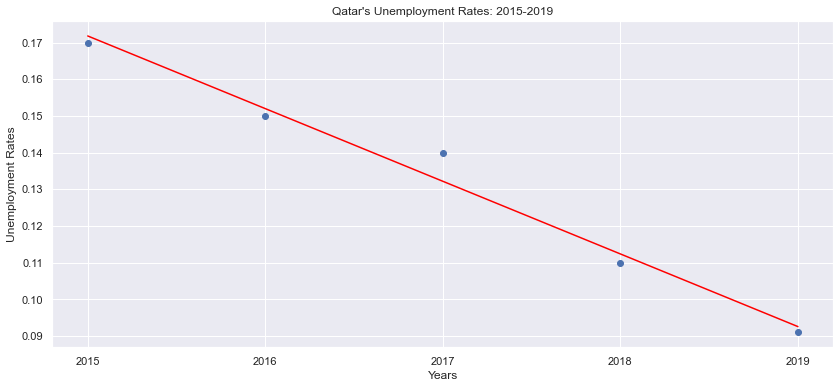

In [728]:
fig = plt.figure(figsize=(14,6))
plt.scatter(X, y)
plt.plot(X, predicted, color = 'red')
plt.xticks(np.arange(2015, 2020, 1))
plt.xlabel("Years")
plt.ylabel("Unemployment Rates")
plt.title("Qatar's Unemployment Rates: 2015-2019")

A score is calculated to judge the reliability of the model.

In [655]:
regr.score(X, y)

0.9808847116869527

Now, predictions are made for the next five years as shown below and a plot is drafted.

In [729]:
years=[2020, 2021, 2022, 2023, 2024]
future=np.array(years).reshape(-1, 1)
future_unemployment=regr.predict(future)

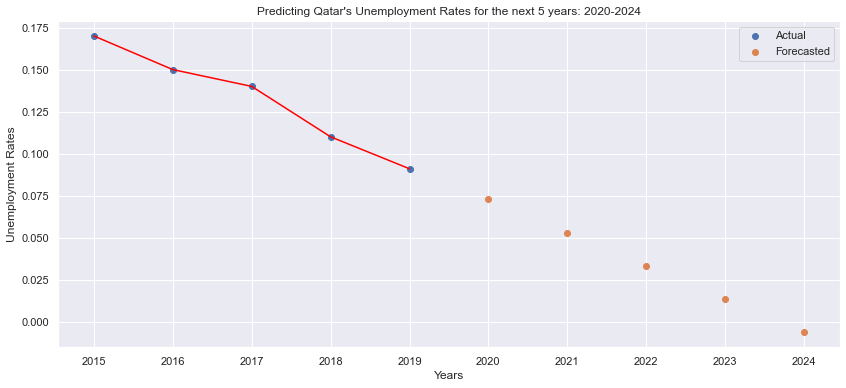

In [731]:
fig=plt.figure(figsize=(14,6))
plt.scatter(X, y, label='Actual')
plt.plot(X, y, color = 'Red')
plt.scatter(years, future_unemployment, marker='o', label='Forecasted')
plt.xticks(np.arange(2015, 2025, 1))
plt.xlabel("Years")
plt.ylabel("Unemployment Rates")
plt.title("Predicting Qatar's Unemployment Rates for the next 5 years: 2020-2024")
plt.legend()

In [732]:
Qatar_new= Qatar[['Year', 'Inflation %']]
Qatar_new['Year'] = Qatar_new['Year'].astype('int')
X  = Qatar_new.iloc[:, 0].values.reshape(-1, 1)
y = Qatar_new.iloc[:, 1].values.reshape(-1, 1)

In [733]:
regr_inf = linear_model.LinearRegression()

In [734]:
regr_inf.fit(X,y)

LinearRegression()

In [735]:
predicted_inf = regr_inf.predict(X)

Text(0.5, 1.0, "Qatar's Inflation Rates: 2015-2019")

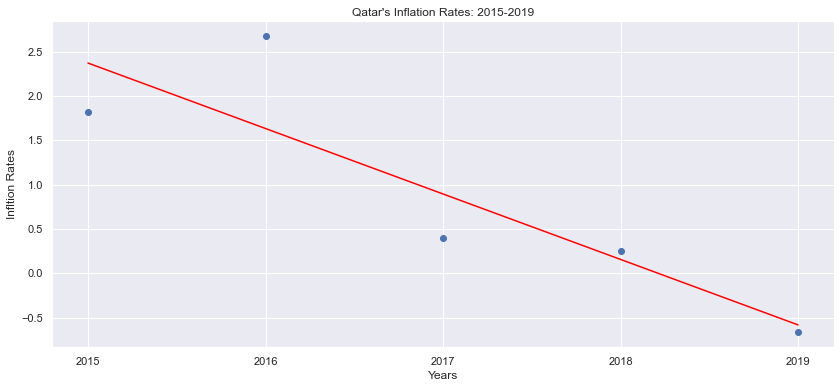

In [736]:
fig = plt.figure(figsize=(14,6))
plt.scatter(X, y)
plt.plot(X, predicted_inf, color = 'red')
plt.xticks(np.arange(2015, 2020, 1))
plt.xlabel("Years")
plt.ylabel("Infltion Rates")
plt.title("Qatar's Inflation Rates: 2015-2019")

In [737]:
regr_inf.score(X, y)

0.7658199045616377

In [738]:
years=[2020, 2021, 2022, 2023, 2024]
future=np.array(years).reshape(-1, 1)
future_inflationt=regr_inf.predict(future)

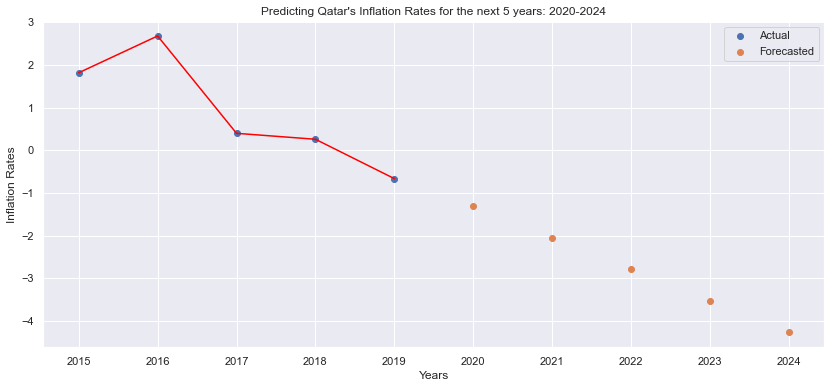

In [740]:
fig=plt.figure(figsize=(14,6))
plt.scatter(X, y, label='Actual')
plt.plot(X, y, color = 'Red')
plt.scatter(years, future_inflationt, marker='o', label='Forecasted')
plt.xticks(np.arange(2015, 2025, 1))
plt.xlabel("Years")
plt.ylabel("Inflation Rates")
plt.title("Predicting Qatar's Inflation Rates for the next 5 years: 2020-2024")
plt.legend()

To conclude, it can be stated that we can expect both Qatar's unemployment and inflation rates to steadily decline in the future. It is important to note that Qatar's low unemployment rate can be attributed to the following - 

1. Low unemployment amongst expatriate population as most expatriate residence permits are linked to their employment permits. Most expatriates exit the country once they are unemployed. 


2. Recent developments in the oil and gas sector have also created a few employment hubs for both expatriates and citizens. 


3. The country has the capacity to absorb young nationals into public sector jobs, thereby keeping youth unemployment rates lower than the world average. 

On the other hand, Qatar's low inflation rate can be attributed to the following - 

1. In 2017, an economic embargo was imposed on Qatar by Middle Eastern countries, such as Saudi Arabia, UAE, Bahrain, Egypt and others. The imposition of economic sanctions further worsened the real estate market.


2. Falling housing prices are a primary contributor to the country's 2019 consumer price deflation. 

### 5. CONCLUSION

From this analysis, we can conclude that Qatar is a suitable example where low unemployment and deflation co-exist. Research has revealed that a similar trend can be observed in other countries in the Middle East such as Saudi Arabia and United Arab Emirates. Additionally, research has revealed that the coronavirus pandemic has further caused a slump in consumer prices in the Middle East. The average consumer in the region continues to cut expenses and remain frugal. 

However, for most countries across continents, we observe that over the given period of time, unemployment rates decreased with an increase in inflation rates. 

### 6. LEARNING PROCESS